# LAB 02 - PHÂN LOẠI CẢM XÚC VỚI TRANSFER LEARNING

**Sinh viên:** Nguyễn Văn Anh Duy  
**MSSV:** SE181823  
**Lớp:** AI1803

---

## Mục tiêu bài lab

Xây dựng và so sánh hai mô hình phân loại cảm xúc sử dụng kỹ thuật Transfer Learning:
1. **Mô hình VGG16**: Kiến trúc cổ điển với các lớp tích chập sâu
2. **Mô hình DenseNet121**: Kiến trúc hiện đại với kết nối dày đặc giữa các lớp

Dataset: Bộ dữ liệu cảm xúc gồm 7 loại (anger, contempt, disgust, fear, happy, sad, surprised)

# PHẦN 1: CÀI ĐẶT VÀ IMPORT THƯ VIỆN

Phần này cài đặt và import các thư viện cần thiết cho việc xây dựng mô hình Deep Learning

In [1]:
# Cài đặt TensorFlow với hỗ trợ GPU (CUDA)
%pip install "tensorflow[and-cuda]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 12.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 113.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 107.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 122.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 99.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 57.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 KB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 KB 126.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 KB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1

In [2]:
# Kiểm tra phiên bản TensorFlow và GPU
import tensorflow as tf

print(f"Phiên bản TensorFlow: {tf.__version__}")

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Đã phát hiện {len(gpus)} GPU: {gpus}")
else:
    print("Không phát hiện GPU, sẽ sử dụng CPU")

2026-01-17 07:25:41.210412: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Phiên bản TensorFlow: 2.20.0
Đã phát hiện 1 GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Cài đặt các thư viện bổ sung cho visualization và metrics
%pip install matplotlib-venn scikit-learn seaborn plotly pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 32.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 107.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 112.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 89.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 KB 125.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.9/432.9 KB 147.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 KB 147.2 MB/s eta 0:00:00
     ━━━━━━━

In [4]:
# Import các thư viện cần thiết
import os
import warnings
import time
import datetime as dt
import multiprocessing as mp
import shutil

# Thư viện Machine Learning
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Thư viện Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Thư viện TensorFlow và Keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras import regularizers

# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np
from PIL import Image

# Cấu hình
warnings.filterwarnings("ignore")
%matplotlib inline

print("Import thư viện thành công!")

Import thư viện thành công!


# PHẦN 2: CẤU HÌNH VÀ TẢI DỮ LIỆU

Phần này thiết lập các tham số và tải dữ liệu huấn luyện từ thư mục

In [5]:
# Thiết lập các tham số cơ bản
data_dir = 'oversampled_train'  # Thư mục chứa dữ liệu đã cân bằng
img_size = 224                  # Kích thước ảnh đầu vào (224x224)
batch_size = 32                 # Số lượng ảnh trong mỗi batch

print(f"Thư mục dữ liệu: {data_dir}")
print(f"Kích thước ảnh: {img_size}x{img_size}")
print(f"Batch size: {batch_size}")

Thư mục dữ liệu: oversampled_train
Kích thước ảnh: 224x224
Batch size: 32


In [7]:
# Tạo ImageDataGenerator để tăng cường dữ liệu và chuẩn hóa
datagen = ImageDataGenerator(
    rescale=1.0 / 255,           # Chuẩn hóa giá trị pixel về [0,1]
    rotation_range=20,           # Xoay ảnh ngẫu nhiên trong khoảng 20 độ
    width_shift_range=0.2,       # Dịch chuyển ngang 20%
    height_shift_range=0.2,      # Dịch chuyển dọc 20%
    shear_range=0.2,             # Biến dạng cắt 20%
    zoom_range=0.2,              # Phóng to/thu nhỏ 20%
    horizontal_flip=True,        # Lật ảnh theo chiều ngang
    validation_split=0.2         # Tách 20% dữ liệu làm validation
)

# Tạo generator cho dữ liệu huấn luyện
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Tạo generator cho dữ liệu validation
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print(f"Tổng số ảnh train: {train_generator.samples}")
print(f"Tổng số ảnh validation: {val_generator.samples}")

Found 1883 images belonging to 7 classes.
Found 469 images belonging to 7 classes.
Tổng số ảnh train: 1883
Tổng số ảnh validation: 469


In [8]:
# Kiểm tra thông tin các lớp cảm xúc
print("Các lớp cảm xúc:", train_generator.class_indices)

# Lấy một batch để kiểm tra
images, labels = next(train_generator)
print(f"Kích thước batch ảnh: {images.shape}")
print(f"Kích thước batch nhãn: {labels.shape}")

Các lớp cảm xúc: {'anger': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'sad': 5, 'surprised': 6}
Kích thước batch ảnh: (32, 224, 224, 3)
Kích thước batch nhãn: (32, 7)


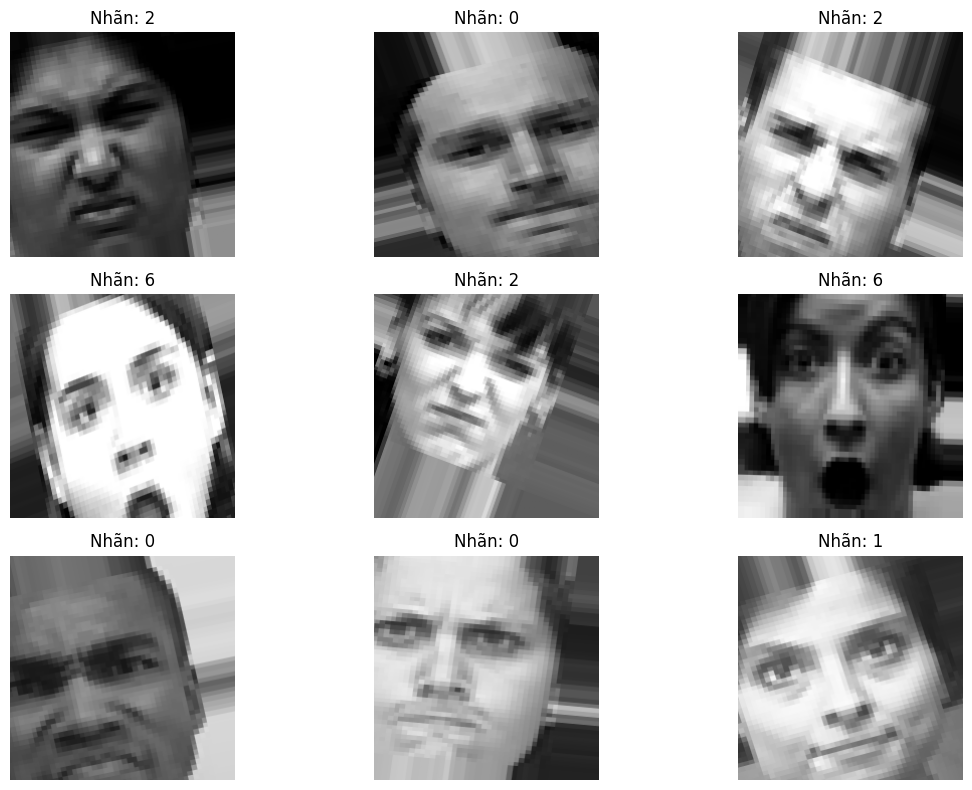

In [9]:
# Hiển thị một số ảnh mẫu từ dữ liệu huấn luyện
images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Nhãn: {np.argmax(labels[i])}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [10]:
# Tính toán trọng số cho các lớp để xử lý dữ liệu mất cân bằng
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
y_train = train_generator.classes

# Tính class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

print("Trọng số các lớp:", class_weights)

Trọng số các lớp: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0), 5: np.float64(1.0), 6: np.float64(1.0)}


# PHẦN 3: XÂY DỰNG MÔ HÌNH VGG16

VGG16 là một mô hình CNN cổ điển với 16 lớp, sử dụng Transfer Learning từ ImageNet

In [11]:
# Bước 1: Tải mô hình VGG16 đã được pre-trained trên ImageNet
base_model = VGG16(
    weights='imagenet',                      # Sử dụng trọng số từ ImageNet
    include_top=False,                       # Không lấy lớp phân loại cuối
    input_shape=(img_size, img_size, 3)     # Kích thước đầu vào
)

# Đóng băng các lớp của base model (không huấn luyện lại)
for layer in base_model.layers:
    layer.trainable = False

print(f"Đã tải VGG16 với {len(base_model.layers)} lớp")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Đã tải VGG16 với 19 lớp


In [12]:
# Bước 2: Thêm các lớp phân loại tùy chỉnh
x = Flatten()(base_model.output)              # Làm phẳng output
x = Dense(256, activation='relu')(x)          # Lớp Dense với 256 neurons
x = Dropout(0.6)(x)                           # Dropout 60% để tránh overfitting
output = Dense(len(class_labels), activation='softmax')(x)  # Lớp output với softmax

# Tạo model hoàn chỉnh
model = Model(inputs=base_model.input, outputs=output)

print("Đã xây dựng xong mô hình VGG16")

Đã xây dựng xong mô hình VGG16


In [14]:
# Bước 3: Compile mô hình
model.compile(
    optimizer=Adam(learning_rate=0.0001),    # Tối ưu hóa Adam với learning rate nhỏ
    loss='categorical_crossentropy',         # Hàm loss cho phân loại đa lớp
    metrics=['accuracy']                     # Đo lường độ chính xác
)

print("Đã compile mô hình VGG16 thành công")

# Setup Callbacks để tự động lưu model tốt nhất
from datetime import datetime

log_dir_vgg16 = os.path.join("logs", "vgg16_new", datetime.now().strftime("%Y%m%d-%H%M%S"))

callbacks_vgg16 = [
    ModelCheckpoint(
        'best_model_vgg16_auto.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    TensorBoard(log_dir=log_dir_vgg16)
]

Đã compile mô hình VGG16 thành công


In [15]:
# Bước 4: Huấn luyện mô hình VGG16
history = model.fit(
    train_generator,                  # Dữ liệu train
    validation_data=val_generator,    # Dữ liệu validation
    epochs=100,                       # Số epochs
    class_weight=class_weights,       # Trọng số các lớp
    callbacks=callbacks_vgg16,
    verbose=1
)

print("Hoàn thành huấn luyện VGG16")

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.2037 - loss: 2.1040
Epoch 1: val_accuracy improved from None to 0.40512, saving model to best_model_vgg16_auto.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 30s 422ms/step - accuracy: 0.2289 - loss: 1.9401 - val_accuracy: 0.4051 - val_loss: 1.6862 - learning_rate: 1.0000e-04
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.3639 - loss: 1.6576
Epoch 2: val_accuracy improved from 0.40512 to 0.47335, saving model to best_model_vgg16_auto.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 316ms/step - accuracy: 0.3664 - loss: 1.6379 - val_accuracy: 0.4733 - val_loss: 1.5361 - learning_rate: 1.0000e-04
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.4266 - loss: 1.5132
Epoch 3: val_accuracy did not improve from 0.47335
59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.4472 - loss: 1.4789 - val_accuracy: 0.4606 - val_loss: 1.4364 - learning_rate: 1.0000e-04
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step 

# PHẦN 4: ĐÁNH GIÁ MÔ HÌNH VGG16

Phần này đánh giá hiệu suất của mô hình VGG16 trên tập validation và test

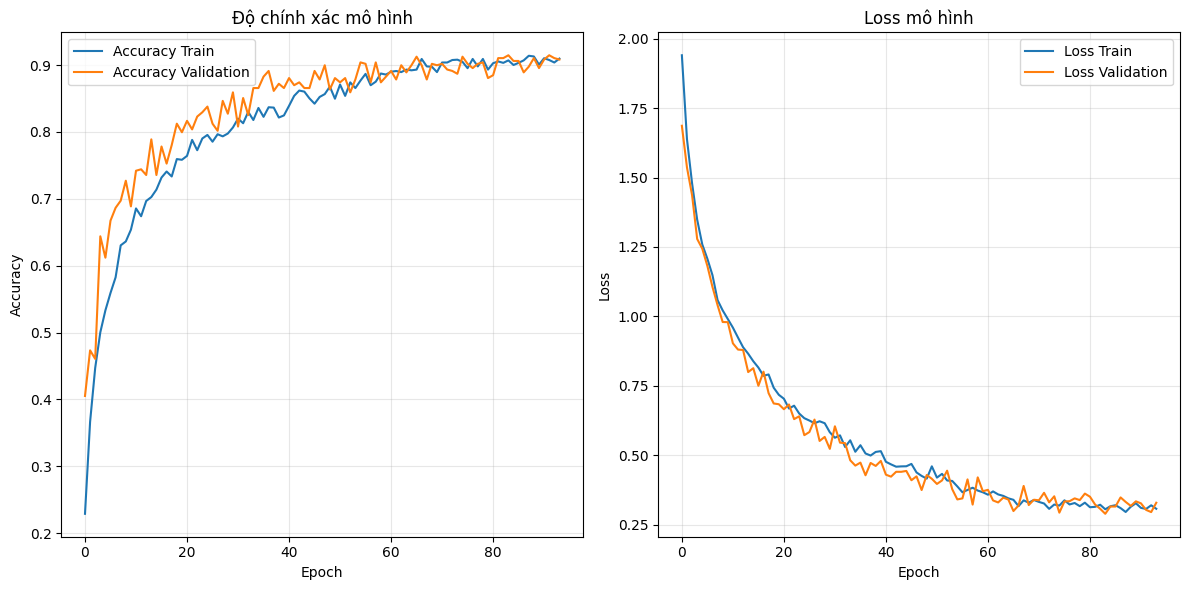

In [17]:
# Vẽ đồ thị Loss và Accuracy trong quá trình huấn luyện
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    
    # Đồ thị Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy Train')
    plt.plot(history.history['val_accuracy'], label='Accuracy Validation')
    plt.title('Độ chính xác mô hình')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Đồ thị Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss Train')
    plt.plot(history.history['val_loss'], label='Loss Validation')
    plt.title('Loss mô hình')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Vẽ đồ thị
plot_training_history(history)

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 270ms/step


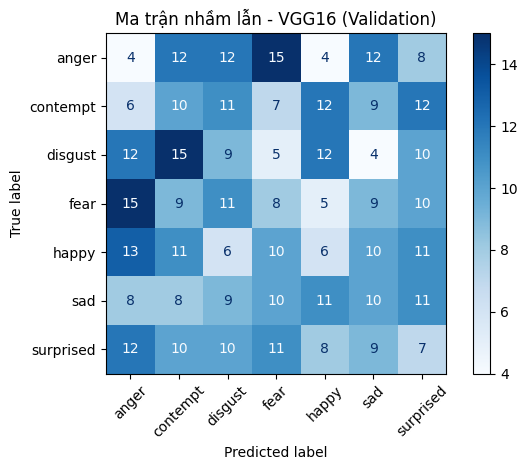

In [18]:
# Ma trận nhầm lẫn (Confusion Matrix) trên tập Validation
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Tạo confusion matrix
class_names = list(val_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

# Hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Ma trận nhầm lẫn - VGG16 (Validation)')
plt.tight_layout()
plt.show()

In [20]:
# Chuẩn bị dữ liệu test
test_dir = 'test'

# Tạo generator cho dữ liệu test (không tăng cường)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Không shuffle để đảm bảo thứ tự
)

print(f"Tổng số ảnh test: {test_generator.samples}")

Found 242 images belonging to 7 classes.
Tổng số ảnh test: 242


In [21]:
# Đánh giá mô hình VGG16 trên tập test
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"\nKết quả VGG16 trên tập Test:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.9380 - loss: 0.2914

Kết quả VGG16 trên tập Test:
Test Loss: 0.2914
Test Accuracy: 0.9380


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


<Figure size 1000x800 with 0 Axes>

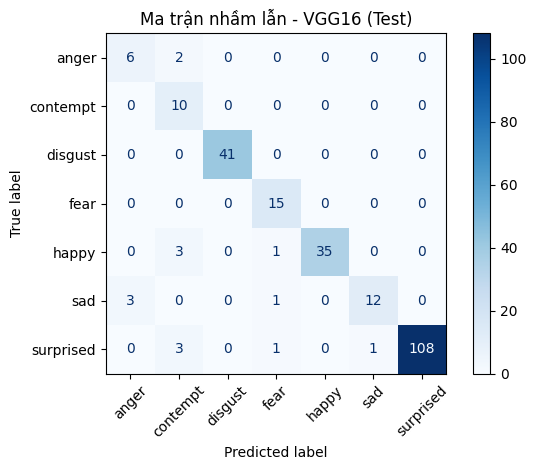


Báo cáo phân loại VGG16:
              precision    recall  f1-score   support

       anger     0.6667    0.7500    0.7059         8
    contempt     0.5556    1.0000    0.7143        10
     disgust     1.0000    1.0000    1.0000        41
        fear     0.8333    1.0000    0.9091        15
       happy     1.0000    0.8974    0.9459        39
         sad     0.9231    0.7500    0.8276        16
   surprised     1.0000    0.9558    0.9774       113

    accuracy                         0.9380       242
   macro avg     0.8541    0.9076    0.8686       242
weighted avg     0.9552    0.9380    0.9422       242

Precision trung bình: 0.9552
Recall trung bình: 0.9380
F1-Score trung bình: 0.9422


In [22]:
# Đánh giá chi tiết mô hình VGG16 trên tập test

# Dự đoán trên tập test
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Ma trận nhầm lẫn
class_names = list(test_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Ma trận nhầm lẫn - VGG16 (Test)')
plt.tight_layout()
plt.show()

# Báo cáo phân loại chi tiết
print("\nBáo cáo phân loại VGG16:")
print("="*70)
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)

# Các chỉ số tổng hợp
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("="*70)
print(f"Precision trung bình: {precision:.4f}")
print(f"Recall trung bình: {recall:.4f}")
print(f"F1-Score trung bình: {f1:.4f}")
print("="*70)

# PHẦN 5: XÂY DỰNG MÔ HÌNH DENSENET121

DenseNet121 là kiến trúc hiện đại với kết nối dày đặc giữa các lớp, giúp gradient flow tốt hơn và giảm số tham số

In [23]:
# Bước 1: Tải mô hình DenseNet121 pre-trained
densenet_base = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)

# Đóng băng các lớp của base model
for layer in densenet_base.layers:
    layer.trainable = False

print(f"Đã tải DenseNet121 với {len(densenet_base.layers)} lớp")

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Đã tải DenseNet121 với 427 lớp


In [24]:
# Bước 2: Thêm các lớp phân loại tùy chỉnh cho DenseNet
x = GlobalAveragePooling2D()(densenet_base.output)     # Pooling toàn cục
x = BatchNormalization()(x)                             # Chuẩn hóa batch
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)  # Dense 512
x = Dropout(0.5)(x)                                     # Dropout 50%
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)  # Dense 256
x = Dropout(0.5)(x)                                     # Dropout 50%
output = Dense(len(class_labels), activation='softmax')(x)  # Lớp output

# Tạo model DenseNet hoàn chỉnh
densenet_model = Model(inputs=densenet_base.input, outputs=output)

print("Đã xây dựng xong mô hình DenseNet121")

Đã xây dựng xong mô hình DenseNet121


In [25]:
# Bước 3: Compile mô hình DenseNet121
densenet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Đã compile mô hình DenseNet121 thành công")

Đã compile mô hình DenseNet121 thành công


In [26]:
# Bước 4: Thiết lập các callbacks cho quá trình huấn luyện
log_dir_densenet = os.path.join("logs", "densenet121", dt.datetime.now().strftime("%Y%m%d-%H%M%S"))

callbacks_densenet = [
    # Dừng sớm nếu không cải thiện sau 10 epochs
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    # Lưu mô hình tốt nhất
    ModelCheckpoint(
        'best_model_densenet121.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    # Giảm learning rate khi không cải thiện
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    # TensorBoard để theo dõi training
    TensorBoard(log_dir=log_dir_densenet, histogram_freq=1)
]

print("Đã cấu hình callbacks cho DenseNet121")

Đã cấu hình callbacks cho DenseNet121


In [27]:
# Bước 5: Huấn luyện mô hình DenseNet121
densenet_history = densenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    class_weight=class_weights,
    callbacks=callbacks_densenet,
    verbose=1
)

print("Hoàn thành huấn luyện DenseNet121")

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.1500 - loss: 3.4837
Epoch 1: val_accuracy improved from None to 0.24094, saving model to best_model_densenet121.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 81s 995ms/step - accuracy: 0.1673 - loss: 3.3357 - val_accuracy: 0.2409 - val_loss: 2.8238 - learning_rate: 1.0000e-04
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.2330 - loss: 3.0470
Epoch 2: val_accuracy improved from 0.24094 to 0.38593, saving model to best_model_densenet121.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 377ms/step - accuracy: 0.2549 - loss: 2.9516 - val_accuracy: 0.3859 - val_loss: 2.6454 - learning_rate: 1.0000e-04
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.3259 - loss: 2.7685
Epoch 3: val_accuracy improved from 0.38593 to 0.52452, saving model to best_model_densenet121.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 377ms/step - accuracy: 0.3441 - loss: 2.7016 - val_accuracy: 0.5245 - val_loss: 2.4683 - learning_rate: 1.0000e-04
E

# PHẦN 6: ĐÁNH GIÁ MÔ HÌNH DENSENET121

Đánh giá hiệu suất của DenseNet121 trên tập validation và test

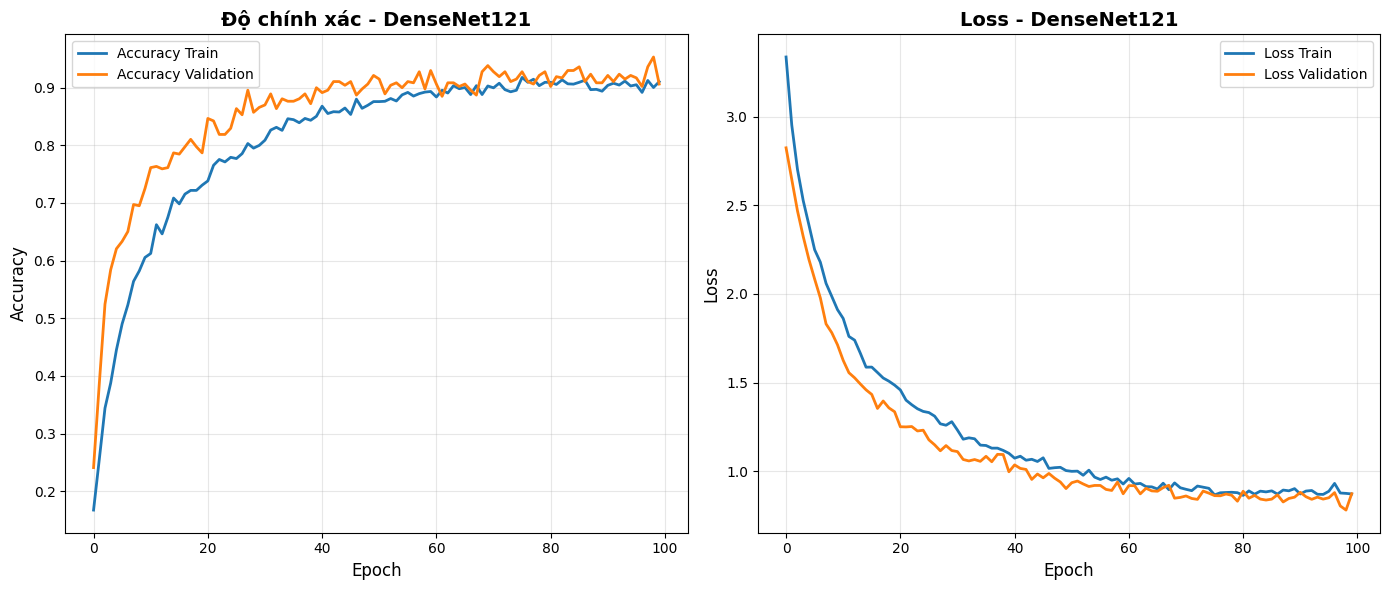

In [28]:
# Vẽ đồ thị Loss và Accuracy cho DenseNet121
def plot_densenet_history(history):
    plt.figure(figsize=(14, 6))
    
    # Đồ thị Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy Train', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Accuracy Validation', linewidth=2)
    plt.title('Độ chính xác - DenseNet121', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # Đồ thị Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss Train', linewidth=2)
    plt.plot(history.history['val_loss'], label='Loss Validation', linewidth=2)
    plt.title('Loss - DenseNet121', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_densenet_history(densenet_history)

15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 948ms/step


<Figure size 1000x800 with 0 Axes>

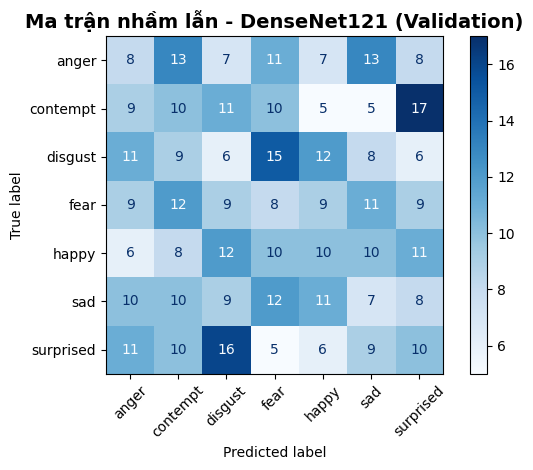

In [29]:
# Ma trận nhầm lẫn cho DenseNet121 trên tập Validation
val_generator.reset()
densenet_predictions = densenet_model.predict(val_generator, verbose=1)
y_pred_densenet = np.argmax(densenet_predictions, axis=1)
y_true_densenet = val_generator.classes

cm_densenet = confusion_matrix(y_true_densenet, y_pred_densenet)

plt.figure(figsize=(10, 8))
disp_densenet = ConfusionMatrixDisplay(confusion_matrix=cm_densenet, display_labels=class_names)
disp_densenet.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Ma trận nhầm lẫn - DenseNet121 (Validation)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [30]:
# Đánh giá DenseNet121 trên tập Test
test_loss_densenet, test_accuracy_densenet = densenet_model.evaluate(test_generator, verbose=1)

print(f"\n{'='*70}")
print(f"Kết quả DenseNet121 trên tập Test:")
print(f"{'='*70}")
print(f"Test Loss: {test_loss_densenet:.4f}")
print(f"Test Accuracy: {test_accuracy_densenet:.4f}")
print(f"{'='*70}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9380 - loss: 0.8168

Kết quả DenseNet121 trên tập Test:
Test Loss: 0.8168
Test Accuracy: 0.9380


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 1000x800 with 0 Axes>

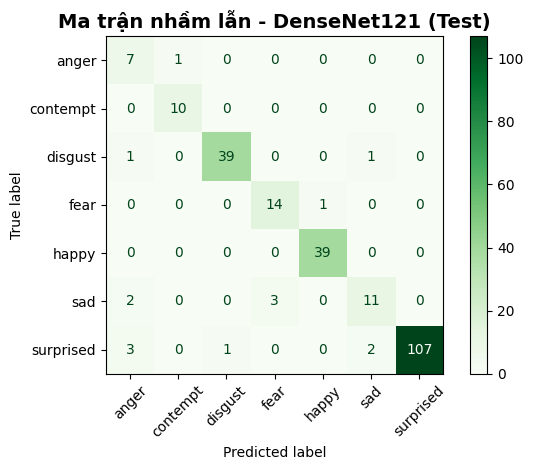


Báo cáo phân loại DenseNet121:
              precision    recall  f1-score   support

       anger     0.5385    0.8750    0.6667         8
    contempt     0.9091    1.0000    0.9524        10
     disgust     0.9750    0.9512    0.9630        41
        fear     0.8235    0.9333    0.8750        15
       happy     0.9750    1.0000    0.9873        39
         sad     0.7857    0.6875    0.7333        16
   surprised     1.0000    0.9469    0.9727       113

    accuracy                         0.9380       242
   macro avg     0.8581    0.9134    0.8786       242
weighted avg     0.9476    0.9380    0.9406       242

Precision trung bình: 0.9476
Recall trung bình: 0.9380
F1-Score trung bình: 0.9406


In [33]:
# Đánh giá chi tiết DenseNet121 trên tập Test
test_generator.reset()
test_predictions_densenet = densenet_model.predict(test_generator, verbose=1)
y_pred_test_densenet = np.argmax(test_predictions_densenet, axis=1)
y_true_test = test_generator.classes

# Ma trận nhầm lẫn
cm_test_densenet = confusion_matrix(y_true_test, y_pred_test_densenet)

plt.figure(figsize=(10, 8))
disp_test_densenet = ConfusionMatrixDisplay(confusion_matrix=cm_test_densenet, display_labels=class_names)
disp_test_densenet.plot(cmap=plt.cm.Greens, xticks_rotation=45)
plt.title('Ma trận nhầm lẫn - DenseNet121 (Test)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Báo cáo phân loại
print("\n" + "="*70)
print("Báo cáo phân loại DenseNet121:")
print("="*70)
report_densenet = classification_report(y_true_test, y_pred_test_densenet, target_names=class_names, digits=4)
print(report_densenet)

# Các chỉ số tổng hợp
precision_densenet = precision_score(y_true_test, y_pred_test_densenet, average='weighted')
recall_densenet = recall_score(y_true_test, y_pred_test_densenet, average='weighted')
f1_densenet = f1_score(y_true_test, y_pred_test_densenet, average='weighted')

print("="*70)
print(f"Precision trung bình: {precision_densenet:.4f}")
print(f"Recall trung bình: {recall_densenet:.4f}")
print(f"F1-Score trung bình: {f1_densenet:.4f}")
print("="*70)

# PHẦN 7: SO SÁNH HAI MÔ HÌNH

So sánh hiệu suất giữa VGG16 và DenseNet121 trên các chỉ số đánh giá

## Ưu điểm của DenseNet121 so với VGG16:

1. **Số tham số ít hơn**: Nhờ kiến trúc Dense Connection, DenseNet sử dụng ít tham số hơn VGG16
2. **Gradient flow tốt hơn**: Kết nối dày đặc giúp gradient truyền tốt hơn qua các lớp
3. **Feature reuse**: Tái sử dụng đặc trưng hiệu quả giữa các lớp
4. **Hiệu suất cao hơn**: Thường cho accuracy cao hơn với cùng số epochs


SO SÁNH MÔ HÌNH - VGG16 vs DenseNet121
    Mô hình  Test Accuracy  Test Loss  Precision   Recall  F1-Score
      VGG16       0.938017   0.291435   0.955199 0.938017  0.942161
DenseNet121       0.938017   0.816834   0.947616 0.938017  0.940585


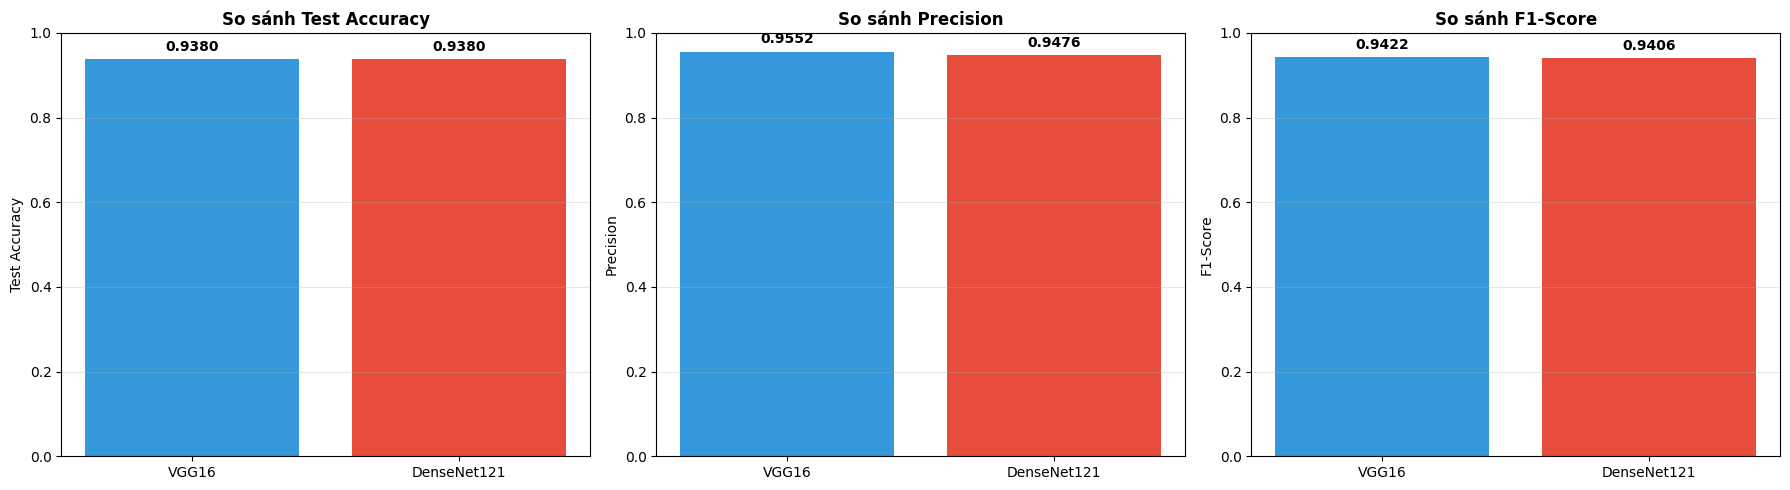

In [34]:
# So sánh kết quả giữa VGG16 và DenseNet121
comparison_data = {
    'Mô hình': ['VGG16', 'DenseNet121'],
    'Test Accuracy': [test_accuracy, test_accuracy_densenet],
    'Test Loss': [test_loss, test_loss_densenet],
    'Precision': [precision, precision_densenet],
    'Recall': [recall, recall_densenet],
    'F1-Score': [f1, f1_densenet]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*70)
print("SO SÁNH MÔ HÌNH - VGG16 vs DenseNet121")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)

# Trực quan hóa so sánh
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Test Accuracy', 'Precision', 'F1-Score']
colors = ['#3498db', '#e74c3c']

for idx, metric in enumerate(metrics):
    axes[idx].bar(comparison_df['Mô hình'], comparison_df[metric], color=colors)
    axes[idx].set_title(f'So sánh {metric}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].set_ylim([0, 1])
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Thêm giá trị trên cột
    for i, v in enumerate(comparison_df[metric]):
        axes[idx].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# PHẦN 8: WEB INTERFACE VỚI STREAMLIT (Phần này em trình bày qua clip demo)

Tạo giao diện web đơn giản để người dùng có thể:
- Upload ảnh hoặc chụp ảnh từ webcam
- Chọn mô hình (VGG16 hoặc DenseNet121) để dự đoán
- Xem kết quả phân loại cảm xúc
